# PROJECT WAS INCONCLUSIVE AND REQUIRED FURTHER WORK

It has been left as is when workshop finished. 

In [16]:
import numpy as np

## I use the simplest method of opening and obtaining the text from the file
FileData = open('accelerometer-data.csv', 'r')

## I print the first line of the .txt file
print(FileData.readline())

## Assign the entire collection of lines to some variable
Data = FileData.readlines()
ax, ay, az = [], [], []
dpitch, dyaw, droll = [], [], []
depth = []

## Begin loop that assigns a variable to a line
for line in Data:
    ## Split lines using Python's command. Here it splits where it seems best to split, usually at spaces
    ax.append(line.split(',')[0])
    ay.append(line.split(',')[1])
    az.append(line.split(',')[2])
    dpitch.append(line.split(',')[4])
    dyaw.append(line.split(',')[5])
    droll.append(line.split(',')[6])
    depth.append(float(line.split(',')[7]) * (-10.3/101325))
    
## Close File
FileData.close()
ax, ay, az = np.asfarray(ax), np.asfarray(ay), np.asfarray(az)
dpitch, dyaw, droll = np.asfarray(dpitch), np.asfarray(dyaw), np.asfarray(droll)
depth = np.asfarray(depth)
T = len(ax)

ax,ay,az,dt,dpitch,dyaw,droll,pressure



In [140]:
def rotation_matrix1(g):
    return np.array([[np.cos(g), -np.sin(g)],[np.sin(g), np.cos(g)]])

def rotation_matrix2(a,b,g):
    return np.array([[np.cos(a)*np.cos(b), np.cos(a)*np.sin(b)*np.sin(g) - np.sin(a)*np.cos(g), np.cos(a)*np.sin(b)*np.cos(g) + np.sin(a)*np.sin(g)], 
                [np.sin(a)*np.cos(b), np.sin(a)*np.sin(b)*np.sin(g) + np.cos(a)*np.cos(g), np.sin(a)*np.sin(b)*np.cos(g) - np.cos(a)*np.sin(g)],
                [-np.sin(b), np.cos(b)*np.sin(g), np.cos(b)*np.cos(g)]])

dt = 0.1
x_0, y_0, z_0 = 0, 0, 0
x, y, z = x_0, y_0, z_0
a_0, b_0, g_0 = 0, 0, 0

X_dash = np.zeros((3,T))

for m in range(T):
    x += x_0 + np.sum(ax[:m]) * (dt**2)
    y += y_0 + np.sum(ay[:m]) * (dt**2)
    z += z_0 + np.sum(az[:m]) * (dt**2)
    
    g = a_0 + np.sum(dpitch[:m]) * dt
    b = b_0 + np.sum(dyaw[:m]) * dt
    a = g_0 + np.sum(droll[:m]) * dt

    X = np.asarray([[x],[y],[z]])
    X = np.matmul(rotation_matrix2(a, b, g), X)
    #X = np.matmul(rotation_matrix1(g), X)
    for i in range(3):
        X_dash[i][m] = X[i]

In [42]:

x_0, y_0 = 0, 0
x, y = x_0, y_0
g_0 = 0

X_dash = np.zeros((2,T))

for m in range(T):
    x += x_0 + np.sum(ax[:m]) * (dt**2)
    y += y_0 + np.sum(ay[:m]) * (dt**2)
    
    g = g_0 + np.sum(droll[:m]) * dt

    X = np.asarray([[x],[y]])
    X = np.matmul(rotation_matrix1(g), X)
    
    for i in range(2):
        X_dash[i][m] = X[i]

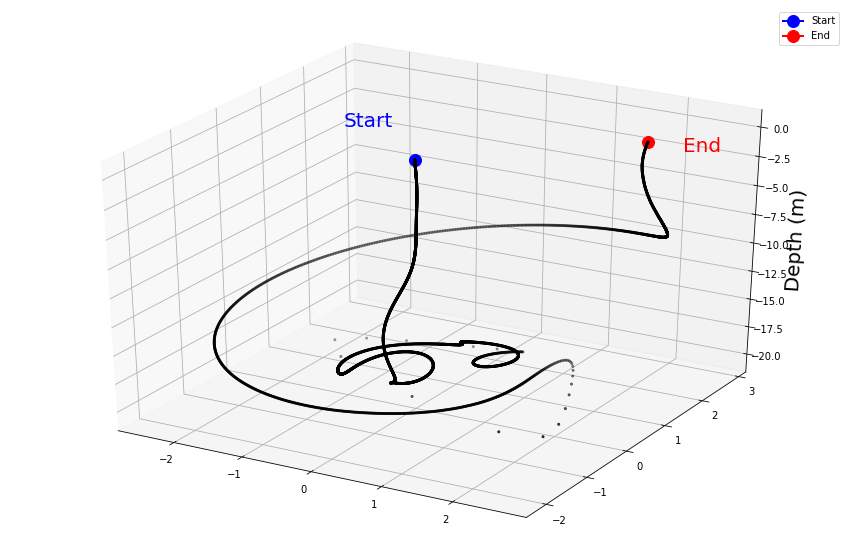

In [147]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
axe = fig.add_subplot(111, projection='3d')

axe.plot([0],[0],[0], label='Start', marker='o', linewidth=2, markersize=12, color='blue')
axe.plot(xs=[X_dash[1][-1]/100], ys=[X_dash[0][-1]/100], zs=[depth[-1]], label='End', marker='o', linewidth=2, markersize=12, color='red')
axe.scatter(xs=X_dash[1]/100, ys=X_dash[0]/100, zs=depth, color='k', marker='.', linewidth=0.75)
axe.text(-1, 0, 1.75, "Start", color='blue', fontsize=20)
axe.text(X_dash[0][-1]/100, X_dash[1][-1]/100, depth[-1]+2, "End", color='red', fontsize=20)
axe.set_zlabel('Depth (m)', fontsize=20)
plt.legend()
plt.show()

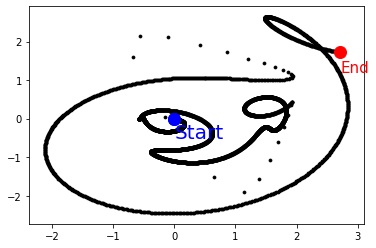

In [150]:
plt.plot([0],[0],[0], label='Start', marker='o', linewidth=2, markersize=12, color='blue')
plt.plot([X_dash[0][-1]/100], [X_dash[1][-1]/100], label='End', marker='o', linewidth=2, markersize=12, color='red')
plt.text(0, -0.5, "Start", color='blue', fontsize=20)
plt.text(X_dash[0][-1]/100, X_dash[1][-1]/100-0.5, s="End", color='red', fontsize=15)

plt.scatter(X_dash[0]/100, X_dash[1]/100, color='k', marker='.', linewidth=0.75)


In [35]:
np.savetxt('PositionData.csv', np.transpose(X_dash), delimiter=',')

In [34]:
np.transpose(X_dash)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01948673e-06, 1.59075754e-06, 1.14706443e-06],
       [8.95274554e-06, 2.27979673e-06, 2.41417184e-06],
       ...,
       [1.71606929e+02, 2.20309308e+02, 2.42840756e+02],
       [1.71761841e+02, 2.20451764e+02, 2.42851254e+02],
       [1.71958271e+02, 2.20618199e+02, 2.42810535e+02]])

In [ ]:
a = 0.00899
b = -0.011991
g = 0.0000135

arr = np.array([[np.cos(a)*np.cos(b), np.cos(a)*np.sin(b)*np.sin(g) - np.sin(a)*np.cos(g), np.cos(a)*np.sin(b)*np.cos(g) + np.sin(a)*np.sin(g)
               ], [np.sin(a)*np.cos(b), np.sin(a)*np.sin(b)*np.sin(g) + np.cos(a)*np.cos(g), np.sin(a)*np.sin(b)*np.cos(g) - np.cos(a)*np.sin(g)], [-np.sin(b), np.cos(b)*np.sin(g), np.cos(b)*np.cos(g)]])

## $x_0 = \sum^0_{n=0}\sum^n_{j=0} a_x(t_j) (\Delta t)^2 = a_x(t_0) (\Delta t)^2 $

## $x_1 = \sum^1_{n=0}\sum^n_{j=0} a_x(t_j) (\Delta t)^2 = (a_x(t_0) + (a_x(t_0) + a_x(t_1)) (\Delta t)^2$

## $x_2 = \sum^2_{n=0}\sum^n_{j=0} a_x(t_j) (\Delta t)^2 = (a_x(t_0) + (a_x(t_0) + a_x(t_1) + (a_x(t_0) + a_x(t_1) + a_x(t_2)) (\Delta t)^2 $

In [30]:
min(az)

-2.9849518649127686